In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

import warnings
warnings.filterwarnings('ignore')

## Importing Data

Flowchart
- get all files
- check the test type
- get the class associated with that type
- split the file into the the: qualities and data

In [4]:
def parse_csv(qualities, files = "data/*.csv"):
    data = {}
    files = glob.glob(files)

    # working in each file
    for file in files:
        key = file.split('/')[1].split("_1.csv")[0][4:]
        data[key] = {}
        
        
        # getting all the single value data queries
        with open(file) as f:
            reader = csv.reader(f)
            for row in reader:
                try:
                    if row[0] in qualities:
                        try:
                            data[key][row[0]] = float(row[2])
                        except:
                            data[key][row[0]] = row[2]
                except:
                    continue

        # getting list type data queries
        with open(file) as f:
            reader = csv.reader(f)
            record_values = False

            time = []
            displacement = []
            force = []
            strain = []
            
            # checks if we are in the time section
            for row in reader:
                if record_values:
                    try:
                        time.append(float(row[0]))
                        displacement.append(float(row[1]))
                        force.append(float(row[2]))
                        strain.append(float(row[3]))
                    except:
                        break
                
                if not record_values:
                    try:
                        if row[0] == "(s)":
                            record_values = True
                    except:
                        continue

            # putting in time values
            data[key]["time"] = time
            data[key]["displacement"] = displacement
            data[key]["force"] = force
            data[key]["strain"] = strain

    return data

In [5]:
qualities = ["Gage Diameter", "Grip Diameter", "Rockwell Hardness", "Rockwell Scale", "Final Gage Diameter"]
data = parse_csv(qualities)

In [6]:
data.keys()

dict_keys(['1045CR', 'BR', '1045NM', 'PMMA', '7075T6', '304', '2024', '1018CR'])

## Question 1

- On a single chart, plot engineering stress-strain curves for:
  - 1018 steel (as received and annealed)
  - 2024 aluminum
  - 304 stainless steel
  - 1045 steel 
- Plot PMMA on a separate plot. 
- Be sure the curves are distinct and labeled.

In [5]:
def stress_strain(key):
    """
    Generates the strain [%] and stress [MPa] from a given key
    """
    
    force = data[key]["force"]
    strain = data[key]["strain"]
    diameter = data[key]["Gage Diameter"]
    
    area = np.pi * diameter**2 / 4
    stress = 1000 * np.array(force) / area

    return (100 * np.array(strain)), stress


def plot_stress_strain(keys, save_name = ''):
    for key in keys:
        strain, stress = stress_strain(key)
        plt.plot(strain, stress, label = key)
    plt.xlabel("Strain [%]")
    plt.ylabel("Stress [MPa]")
    plt.grid("both")
    plt.legend()
    if save_name != '':
        plt.savefig("plots/{}.png".format(save_name), dpi = 600)
    plt.show()

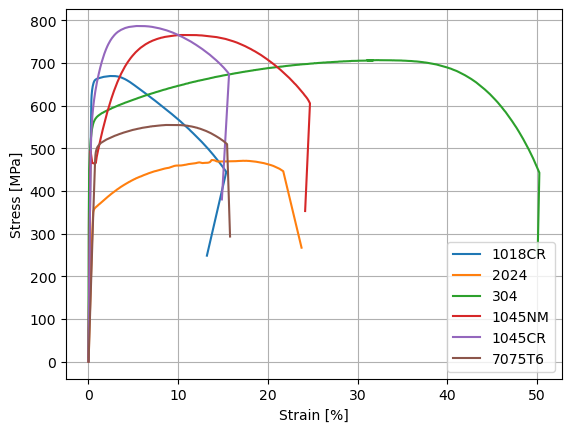

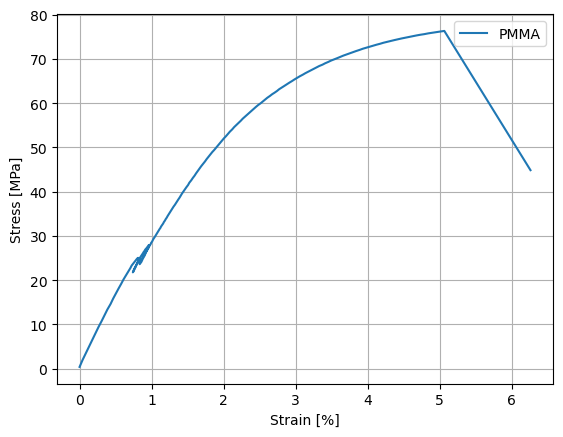

In [6]:
# plotting the metals
q1a = ["1018CR", "2024", "304", "1045NM", "1045CR", "7075T6"]
plot_stress_strain(q1a, "q1metals")

# need 1045CR and 7075-T6

# plotting PMMA
plot_stress_strain(["PMMA"], "q1pmma")

## Question 2

- From the above plots, compute the following:
  - elastic modulus
  - appropriate measure of yield strength
  - ultimate tensile strength
  - percent elongation
  - modulus of resilience
- Prepare a table with each of
these values and include a column for the Rockwell hardness (be sure to correct properly).

In [7]:
q2data = {}

### glipulizing

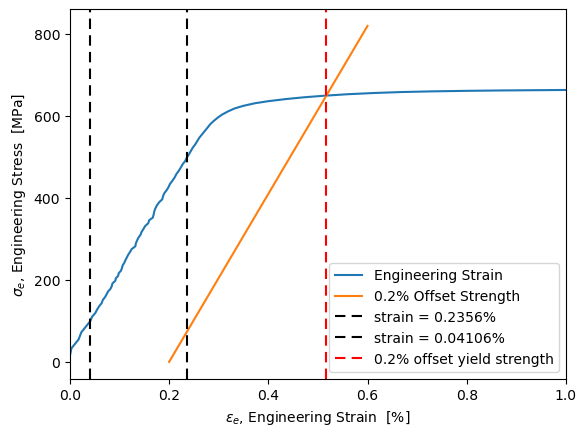

In [8]:
# 1018CR
## change the indices and key
i1, i2 = 60, 5
key = "1018CR"

q2data[key] = {}

strain, stress = stress_strain(key)
drops = strain[i1], strain[i2]

plt.plot(strain, stress, label='Engineering Strain')

m = (stress[i1] - stress[i2]) / (strain[i1] - strain[i2])
## change the second value in linspace
x = np.linspace(.2, .6, 1000)
b = - m * 0.2
y = m * x + b

plt.plot(x,y, label="0.2% Offset Strength")
[plt.axvline(drop, label= "strain = {}%".format(round(drop,8)), ls=(0,(5,3)), c="k") for drop in drops]
## change axvalue to intercept the 0.2% and engineering strain
axvalue = 0.517
plt.axvline(axvalue, label= "0.2% offset yield strength", ls=(0,(5,3)), c="r")

## change the value of the xlim, then swap which one is commented out
#plt.xlim(.5,.55)
plt.xlim(0, 1)
plt.xlabel(r'$\epsilon_e$, Engineering Strain  [%]')
plt.ylabel(r'$\sigma_e$, Engineering Stress  [MPa]')
plt.legend()

plt.savefig("plots/q2{}.png".format(key), dpi=600)

# elastic modulus, 0.2% offset yield strength, ultimate strength
q2data[key]["e"] = m / 10
q2data[key][".2"] = m * axvalue + b
q2data[key]["u"] = np.max(stress)


# percent elongation
d0 = data[key]["Gage Diameter"]
df = data[key]["Final Gage Diameter"]
q2data[key]["%e"] = (df - d0) / d0 * 100

# modulus of resilience
q2data[key]["res"] = q2data[key][".2"]**2 / q2data[key]["e"] / 2 / 1000

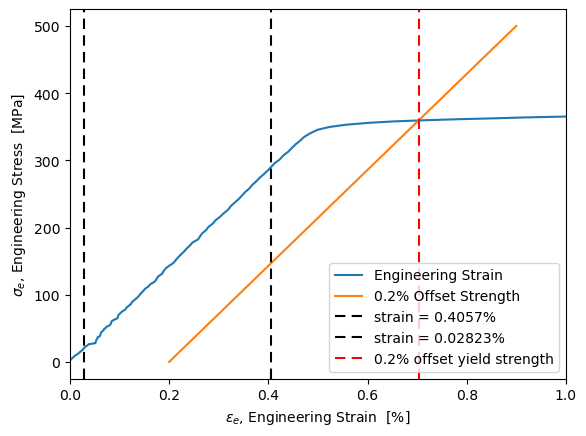

In [9]:
# 2024
## change the indices and key
i1, i2 = 85, 5
key = "2024"

q2data[key] = {}

strain, stress = stress_strain(key)
drops = strain[i1], strain[i2]

plt.plot(strain, stress, label='Engineering Strain')

m = (stress[i1] - stress[i2]) / (strain[i1] - strain[i2])
## change the second value in linspace
x = np.linspace(.2, .9, 1000)
b = - m * 0.2
y = m * x + b

plt.plot(x,y, label="0.2% Offset Strength")
[plt.axvline(drop, label= "strain = {}%".format(round(drop,8)), ls=(0,(5,3)), c="k") for drop in drops]
## change axvalue to intercept the 0.2% and engineering strain
axvalue = 0.703
plt.axvline(axvalue, label= "0.2% offset yield strength", ls=(0,(5,3)), c="r")

## change the value of the xlim, then swap which one is commented out
#plt.xlim(.69,.72)
plt.xlim(0, 1)
plt.xlabel(r'$\epsilon_e$, Engineering Strain  [%]')
plt.ylabel(r'$\sigma_e$, Engineering Stress  [MPa]')
plt.legend()

plt.savefig("plots/q2{}.png".format(key), dpi=600)

# elastic modulus, 0.2% offset yield strength, ultimate strength
q2data[key]["e"] = m / 10
q2data[key][".2"] = m * axvalue + b
q2data[key]["u"] = np.max(stress)


# percent elongation
d0 = data[key]["Gage Diameter"]
df = data[key]["Final Gage Diameter"]
q2data[key]["%e"] = (df - d0) / d0 * 100

# modulus of resilience
q2data[key]["res"] = q2data[key][".2"]**2 / q2data[key]["e"] / 2 / 1000

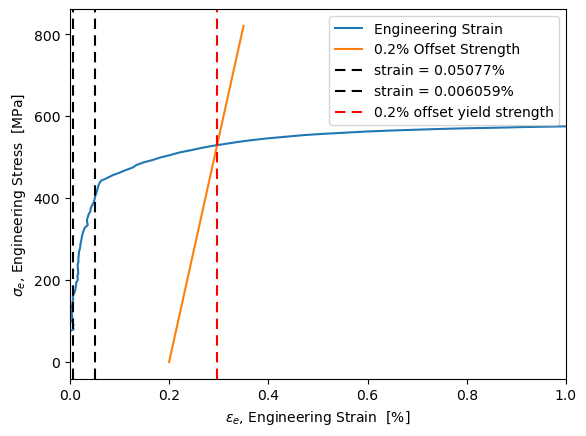

In [10]:
# 304
## change the indices and key
i1, i2 = 75, 35
key = "304"

q2data[key] = {}

strain, stress = stress_strain(key)
drops = strain[i1], strain[i2]

plt.plot(strain, stress, label='Engineering Strain')

m = (stress[i1] - stress[i2]) / (strain[i1] - strain[i2])
## change the second value in linspace
x = np.linspace(.2, .35, 1000)
b = - m * 0.2
y = m * x + b

plt.plot(x,y, label="0.2% Offset Strength")
[plt.axvline(drop, label= "strain = {}%".format(round(drop,8)), ls=(0,(5,3)), c="k") for drop in drops]
## change axvalue to intercept the 0.2% and engineering strain
axvalue = 0.297
plt.axvline(axvalue, label= "0.2% offset yield strength", ls=(0,(5,3)), c="r")

## change the value of the xlim, then swap which one is commented out
#plt.xlim(.29,.3)
plt.xlim(0, 1)
plt.xlabel(r'$\epsilon_e$, Engineering Strain  [%]')
plt.ylabel(r'$\sigma_e$, Engineering Stress  [MPa]')
plt.legend()

plt.savefig("plots/q2{}.png".format(key), dpi=600)

# elastic modulus, 0.2% offset yield strength, ultimate strength
q2data[key]["e"] = m / 10
q2data[key][".2"] = m * axvalue + b
q2data[key]["u"] = np.max(stress)


# percent elongation
d0 = data[key]["Gage Diameter"]
df = data[key]["Final Gage Diameter"]
q2data[key]["%e"] = (df - d0) / d0 * 100

# modulus of resilience
q2data[key]["res"] = q2data[key][".2"]**2 / q2data[key]["e"] / 2 / 1000

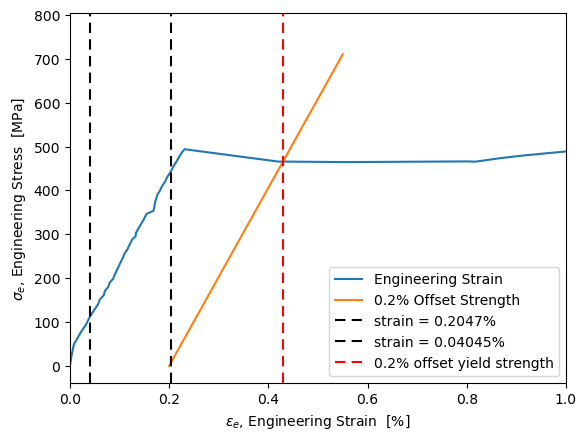

In [11]:
# 1045NM
## change the indices and key
i1, i2 = 45, 5
key = "1045NM"

q2data[key] = {}

strain, stress = stress_strain(key)
drops = strain[i1], strain[i2]

plt.plot(strain, stress, label='Engineering Strain')

m = (stress[i1] - stress[i2]) / (strain[i1] - strain[i2])
## change the second value in linspace
x = np.linspace(.2, .55, 1000)
b = - m * 0.2
y = m * x + b

plt.plot(x,y, label="0.2% Offset Strength")
[plt.axvline(drop, label= "strain = {}%".format(round(drop,8)), ls=(0,(5,3)), c="k") for drop in drops]
## change axvalue to intercept the 0.2% and engineering strain
axvalue = 0.43
plt.axvline(axvalue, label= "0.2% offset yield strength", ls=(0,(5,3)), c="r")

## change the value of the xlim, then swap which one is commented out
#plt.xlim(.425,.435)
plt.xlim(0, 1)
plt.xlabel(r'$\epsilon_e$, Engineering Strain  [%]')
plt.ylabel(r'$\sigma_e$, Engineering Stress  [MPa]')
plt.legend()

plt.savefig("plots/q2{}.png".format(key), dpi=600)

# elastic modulus, 0.2% offset yield strength, ultimate strength
q2data[key]["e"] = m / 10
q2data[key][".2"] = m * axvalue + b
q2data[key]["u"] = np.max(stress)


# percent elongation
d0 = data[key]["Gage Diameter"]
df = data[key]["Final Gage Diameter"]
q2data[key]["%e"] = (df - d0) / d0 * 100

# modulus of resilience
q2data[key]["res"] = q2data[key][".2"]**2 / q2data[key]["e"] / 2 / 1000

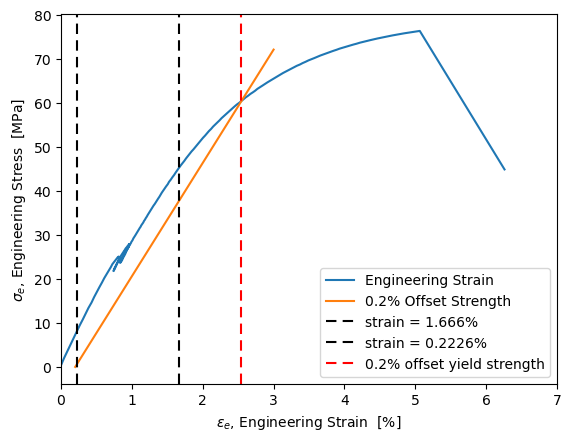

In [12]:
# PMMA
## change the indices and key
i1, i2 = 200, 5
key = "PMMA"

q2data[key] = {}

strain, stress = stress_strain(key)
drops = strain[i1], strain[i2]

plt.plot(strain, stress, label='Engineering Strain')

m = (stress[i1] - stress[i2]) / (strain[i1] - strain[i2])
## change the second value in linspace
x = np.linspace(.2, 3, 1000)
b = - m * 0.2
y = m * x + b

plt.plot(x,y, label="0.2% Offset Strength")
[plt.axvline(drop, label= "strain = {}%".format(round(drop,8)), ls=(0,(5,3)), c="k") for drop in drops]
## change axvalue to intercept the 0.2% and engineering strain
axvalue = 2.54
plt.axvline(axvalue, label= "0.2% offset yield strength", ls=(0,(5,3)), c="r")

## change the value of the xlim, then swap which one is commented out
#plt.xlim(2.4,2.7)
plt.xlim(0, 7)
plt.xlabel(r'$\epsilon_e$, Engineering Strain  [%]')
plt.ylabel(r'$\sigma_e$, Engineering Stress  [MPa]')
plt.legend()

plt.savefig("plots/q2{}.png".format(key), dpi=600)

# elastic modulus, 0.2% offset yield strength, ultimate strength
q2data[key]["e"] = m / 10
q2data[key][".2"] = m * axvalue + b
q2data[key]["u"] = np.max(stress)


# percent elongation
d0 = data[key]["Gage Diameter"]
df = data[key]["Final Gage Diameter"]
q2data[key]["%e"] = (df - d0) / d0 * 100

# modulus of resilience
q2data[key]["res"] = q2data[key][".2"]**2 / q2data[key]["e"] / 2 / 1000

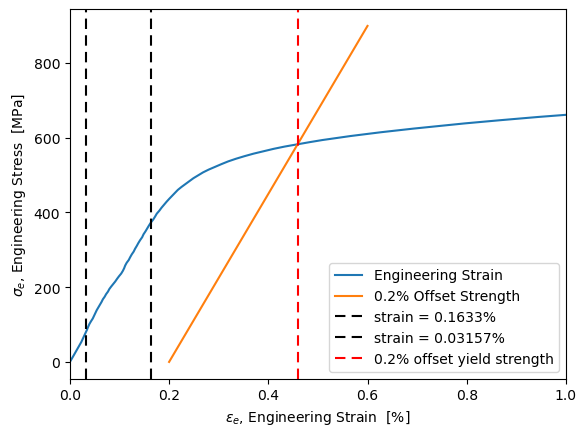

In [13]:
# 1045CR
## change the indices and key
i1, i2 = 45, 5
key = "1045CR"

q2data[key] = {}

strain, stress = stress_strain(key)
drops = strain[i1], strain[i2]

plt.plot(strain, stress, label='Engineering Strain')

m = (stress[i1] - stress[i2]) / (strain[i1] - strain[i2])
## change the second value in linspace
x = np.linspace(.2, .6, 1000)
b = - m * 0.2
y = m * x + b

plt.plot(x,y, label="0.2% Offset Strength")
[plt.axvline(drop, label= "strain = {}%".format(round(drop,8)), ls=(0,(5,3)), c="k") for drop in drops]
## change axvalue to intercept the 0.2% and engineering strain
axvalue = 0.459
plt.axvline(axvalue, label= "0.2% offset yield strength", ls=(0,(5,3)), c="r")

## change the value of the xlim, then swap which one is commented out
#plt.xlim(.45,.47)
plt.xlim(0, 1)
plt.xlabel(r'$\epsilon_e$, Engineering Strain  [%]')
plt.ylabel(r'$\sigma_e$, Engineering Stress  [MPa]')
plt.legend()

plt.savefig("plots/q2{}.png".format(key), dpi=600)

# elastic modulus, 0.2% offset yield strength, ultimate strength
q2data[key]["e"] = m / 10
q2data[key][".2"] = m * axvalue + b
q2data[key]["u"] = np.max(stress)


# percent elongation
d0 = data[key]["Gage Diameter"]
df = data[key]["Final Gage Diameter"]
q2data[key]["%e"] = (df - d0) / d0 * 100

# modulus of resilience
q2data[key]["res"] = q2data[key][".2"]**2 / q2data[key]["e"] / 2 / 1000

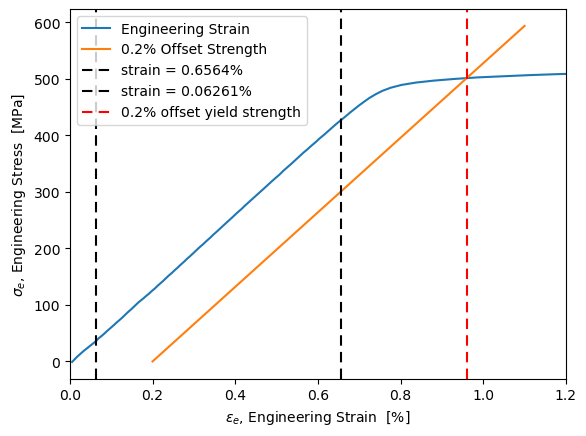

In [14]:
# 7075T6
## change the indices and key
i1, i2 = 80, 5
key = "7075T6"

q2data[key] = {}

strain, stress = stress_strain(key)
drops = strain[i1], strain[i2]

plt.plot(strain, stress, label='Engineering Strain')

m = (stress[i1] - stress[i2]) / (strain[i1] - strain[i2])
## change the second value in linspace
x = np.linspace(.2, 1.1, 1000)
b = - m * 0.2
y = m * x + b

plt.plot(x,y, label="0.2% Offset Strength")
[plt.axvline(drop, label= "strain = {}%".format(round(drop,8)), ls=(0,(5,3)), c="k") for drop in drops]
## change axvalue to intercept the 0.2% and engineering strain
axvalue = 0.96
plt.axvline(axvalue, label= "0.2% offset yield strength", ls=(0,(5,3)), c="r")

## change the value of the xlim, then swap which one is commented out
#plt.xlim(.95,1)
plt.xlim(0, 1.2)
plt.xlabel(r'$\epsilon_e$, Engineering Strain  [%]')
plt.ylabel(r'$\sigma_e$, Engineering Stress  [MPa]')
plt.legend()

plt.savefig("plots/q2{}.png".format(key), dpi=600)

# elastic modulus, 0.2% offset yield strength, ultimate strength
q2data[key]["e"] = m / 10
q2data[key][".2"] = m * axvalue + b
q2data[key]["u"] = np.max(stress)


# percent elongation
d0 = data[key]["Gage Diameter"]
df = data[key]["Final Gage Diameter"]
q2data[key]["%e"] = (df - d0) / d0 * 100

# modulus of resilience
q2data[key]["res"] = q2data[key][".2"]**2 / q2data[key]["e"] / 2 / 1000

### making the $\LaTeX$ table

In [15]:
output = ""
line_starters = ["\textbf{Elastic Modulus [GPa]}",
                 "\textbf{0.2\% Y.S. [MPA]}",
                 "\textbf{Ult. Strength [MPa]}",
                 "\textbf{\% Elongation}",
                 "\textbf{Resilience Modulus [GPa]}"]

index = 0
for key in q2data["PMMA"]:
    output += line_starters[index]

    for mat in q2data:
        output += " & " + str(round(q2data[mat][key],3))

    output += " \\ \hline "

    index += 1

# some malarkey with the \ and whatnot
output

'\textbf{Elastic Modulus [GPa]} & 204.916 & 71.452 & 546.69 & 202.938 & 2.574 & 224.648 & 65.964 \\ \\hline \textbf{0.2\\% Y.S. [MPA]} & 649.584 & 359.402 & 530.289 & 466.758 & 60.23 & 581.838 & 501.323 \\ \\hline \textbf{Ult. Strength [MPa]} & 669.533 & 472.553 & 706.864 & 765.947 & 76.313 & 787.006 & 554.963 \\ \\hline \textbf{\\% Elongation} & -36.0 & -18.194 & -46.25 & -30.168 & 0.373 & -23.619 & -12.535 \\ \\hline \textbf{Resilience Modulus [GPa]} & 1.03 & 0.904 & 0.257 & 0.537 & 0.705 & 0.753 & 1.905 \\ \\hline '

## Question 3

Plot elastic modulus, yield strength, ultimate tensile strength, percent elongation, and modulus of resilience versus hardness (Rockwell B scale) on separate plots (yield strength and UTS can go on one plot if desired) for all metals tested in labs 1 and 2 (exclude brass). Which property (or properties)
correlate to hardness?

In [16]:
q2data["PMMA"].keys(), data["1045CR"].keys()

(dict_keys(['e', '.2', 'u', '%e', 'res']),
 dict_keys(['Gage Diameter', 'Grip Diameter', 'Rockwell Hardness', 'Rockwell Scale', 'Final Gage Diameter', 'time', 'displacement', 'force', 'strain']))

In [17]:
def q3_plotter(quality, ylabel, savepath):
    for key in data.keys():
        if key != "PMMA" and key != "BR":
            x = data[key]["Rockwell Hardness"]
            y = q2data[key][quality]
            plt.plot(x, y, ".", ms=12, label = key)
    
    plt.legend()
    plt.grid()
    plt.xlabel("Rockwell Hardness B")
    plt.ylabel(ylabel)
    plt.savefig("plots/q3" + savepath + ".png", dpi = 600)
    plt.show()

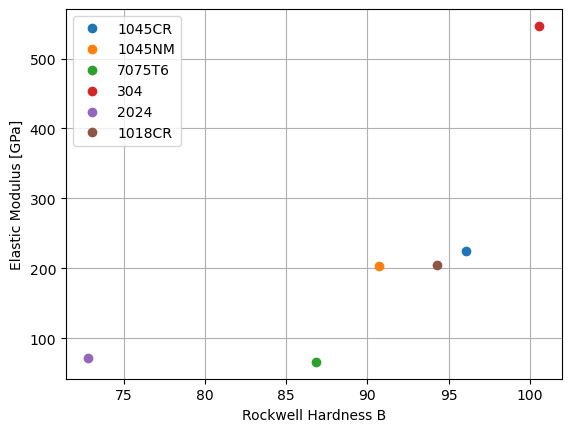

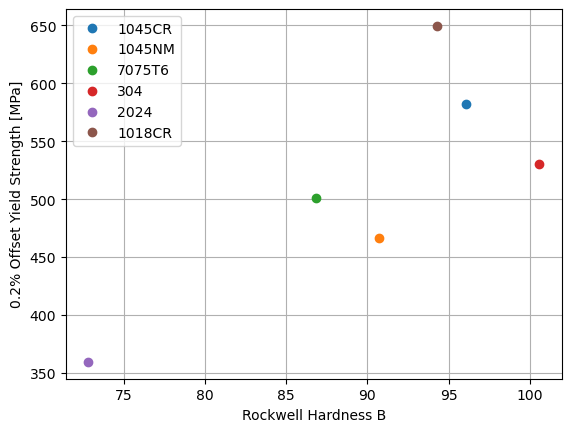

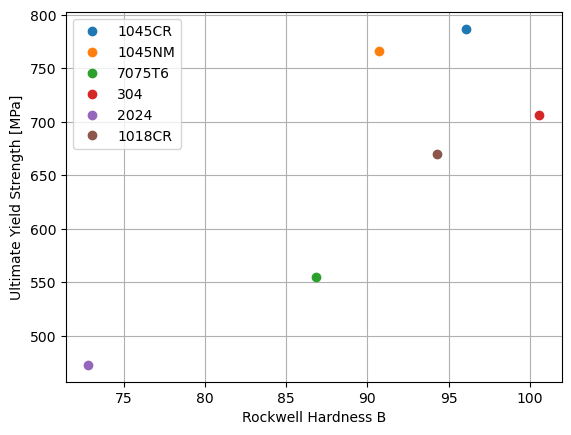

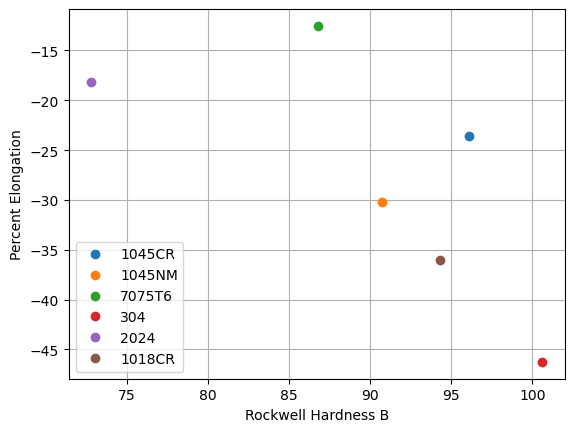

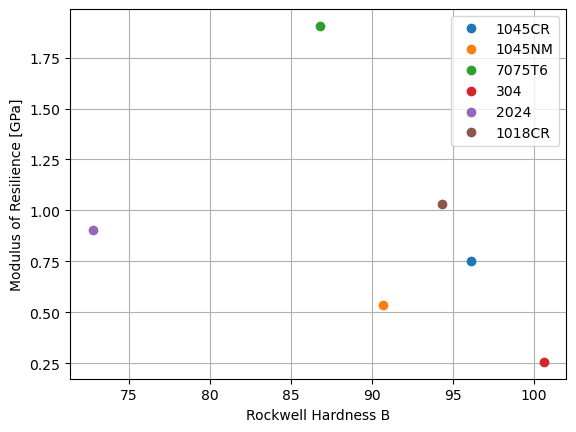

In [18]:
q3_plotter("e", "Elastic Modulus [GPa]", "e")
q3_plotter(".2", "0.2% Offset Yield Strength [MPa]", "2strain")
q3_plotter("u", "Ultimate Yield Strength [MPa]", "ult")
q3_plotter("%e", "Percent Elongation", "elong")
q3_plotter("res", "Modulus of Resilience [GPa]", "res")

## Question 4

Compute the true-stress/true-strain curve for the 304 stainless steel, (using the engineering equations given in the lab manual to estimate true stress and true strain until necking and the failure point). Plot this on a graph with the engineering stress-strain curve for the same material.

In [19]:
# need: strain, stress, radius
data["1045CR"].keys()

dict_keys(['Gage Diameter', 'Grip Diameter', 'Rockwell Hardness', 'Rockwell Scale', 'Final Gage Diameter', 'time', 'displacement', 'force', 'strain'])

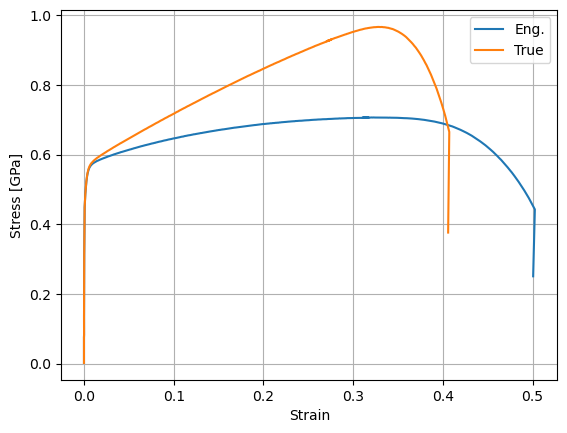

In [20]:
key = "304"

estrain = np.array(data[key]["strain"])
tstrain = np.log(1 + estrain)

force = np.array(data[key]["force"])
radius = data[key]["Gage Diameter"] / 2

estress = force / radius**2 / np.pi
tstress = estress * (1 + estrain)

# plotting
plt.plot(estrain, estress, label = "Eng.")
plt.plot(tstrain, tstress, label = "True")

plt.xlabel("Strain")
plt.ylabel("Stress [GPa]")
plt.grid()
plt.legend()
plt.savefig('plots/q4stress-strain.png', dpi=600)

## Question 5

Using log-log paper or graphics packages (Excel or Kaleidagraph are simple), calculate the values of K and n that best fit your true-stress/true-plastic-strain data with a power-law model,

$σ_t = K(ε_{tp})^n$

In [21]:
import scipy as sci
from scipy.stats import linregress as linreg

# func for scipy
def q5_sci(x, k, n): return k * x**n


def q5_true(lb, ub):
    """Getting the true strain"""
    estrain = np.array(data["304"]["strain"])
    tstrain = np.log(1 + estrain)
    
    force = np.array(data["304"]["force"])
    radius = data[key]["Gage Diameter"] / 2
    
    estress = force / radius**2 / np.pi
    tstress = estress * (1 + estrain)
    
    return tstrain[lb:ub], tstress[lb:ub]


def q5_closest(val, data):
    is_close = []
    for d in data:
        is_close.append(abs(data - val))
    is_close = np.array(is_close)
    return np.argmin(is_close)

1.1067299362035354 0.16480467178722827


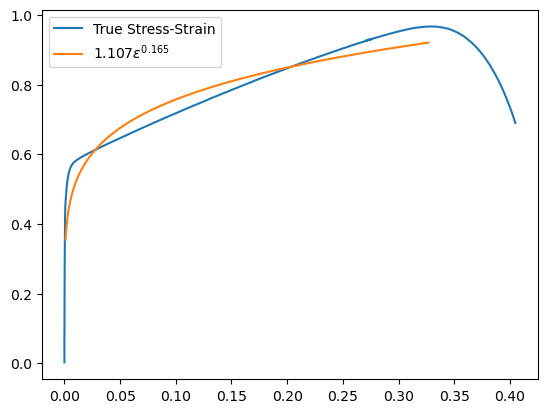

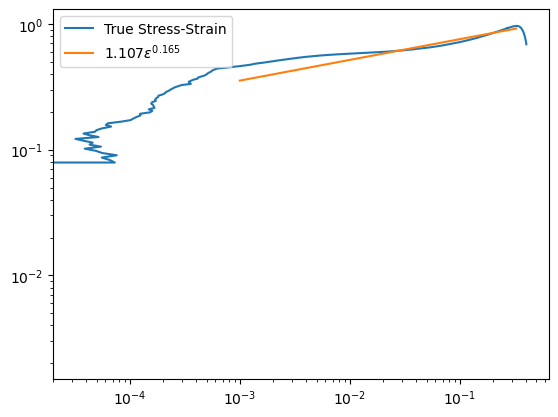

In [22]:
strain, stress = q5_true(0, 720)
fit_strain, fit_stress = q5_true(q5_closest(0.001, strain), np.argmax(stress))

plt.plot(strain, stress, label = "True Stress-Strain")

K, n = sci.optimize.curve_fit(q5_sci, fit_strain, fit_stress)[0]
print(K, n)
plt.plot(fit_strain, q5_sci(fit_strain, K, n), label = "1.107$\epsilon^{0.165}$")
plt.legend()
plt.savefig("plots/q5powerlaw.png", dpi=600)
plt.show()

plt.loglog(strain, stress, label = "True Stress-Strain")
plt.loglog(fit_strain, q5_sci(fit_strain, K, n), label = "1.107$\epsilon^{0.165}$")
plt.legend()
plt.savefig("plots/q5loglog.png", dpi=600)
plt.show()

## Question 6

Plot the stress-strain curve from the brass demo. From this plot, determine the elastic modulus and the yield strength for the initial material, and for the first two reloadings. Present these data in tabular form, showing modulus and yield strength as a function of plastic strain at the beginning of the cycle.

,0,1,2
Elastic Modulus [GPa],54.128477,55.713278,46.380403
Yield Strength,0.272135,0.318801,0.371116


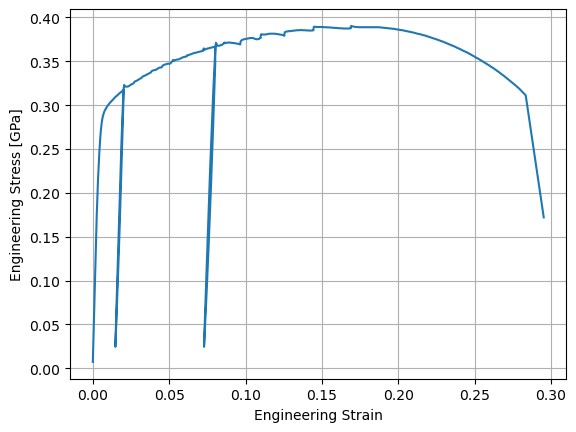

In [23]:
def stress_strain(key):
    strain = np.array(data[key]["strain"])
    
    force = np.array(data[key]["force"])
    radius = data[key]["Gage Diameter"] / 2
    
    stress = force / radius**2 / np.pi

    return strain, stress

strain, stress = stress_strain("BR")
bounds = [[0,68], [95, 158], [242, 320]]
strengths = [stress[ub] for lb, ub in bounds]

slopes = []

for lb, ub in bounds:
    _x, _y = strain[lb:ub], stress[lb:ub]
    m = linreg(_x, _y).slope
    slopes.append(m)

q6df = pd.DataFrame([slopes, strengths])
q6df.index = ["Elastic Modulus [GPa]", "Yield Strength"]

plt.plot(strain, stress)
plt.grid()
plt.xlabel("Engineering Strain")
plt.ylabel("Engineering Stress [GPa]")
plt.savefig("plots/q6brass.png", dpi = 600)

q6df